# TASK1 - Supervised_ML 

<P>
    This is My submission of task #1 for GRIP internship at The Spark Foundation. 

# Problem Statement:

<P> Predict the Marks of a given student based on the number of hours of study. Also Calculate the Score if Student studies for 9.25 hrs/day 

## Importing libraries


In [1]:
# for arrays and stuff 
import numpy as np  

# for plotting our data 
import matplotlib.pyplot as plt  
%matplotlib inline

# for Data Manipulation  
import pandas as pd 

# for train-test-split
from sklearn.model_selection import train_test_split

# for Scalling Data
from sklearn.preprocessing import MinMaxScaler

# Linear Regressor
from sklearn.linear_model import LinearRegression

#Evaluators
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## Read data

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Handling Missing Data

In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

#### As there are no missing data points, so we can move to next step

## Visualizing Data 

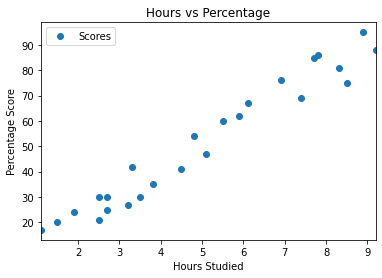

In [4]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Pepraing  Data

In [5]:
# Distribute data into input & output variables.
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [6]:
# Scalling the Data 
scaler=MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)
X

array([[0.17283951],
       [0.49382716],
       [0.25925926],
       [0.91358025],
       [0.2962963 ],
       [0.04938272],
       [1.        ],
       [0.54320988],
       [0.88888889],
       [0.19753086],
       [0.81481481],
       [0.59259259],
       [0.41975309],
       [0.27160494],
       [0.        ],
       [0.96296296],
       [0.17283951],
       [0.09876543],
       [0.61728395],
       [0.77777778],
       [0.19753086],
       [0.45679012],
       [0.33333333],
       [0.71604938],
       [0.82716049]])

## Train Test Split 
- Train 75%
- Test  25%

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape)
print(X_test.shape)

(18, 1)
(7, 1)


## Train the Model

In [8]:
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

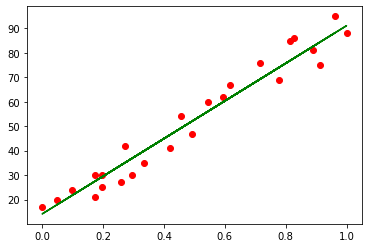

In [9]:
# Plotting the regression line
line = (X * lr.coef_) + lr.intercept_

# Plotting for the test data
plt.scatter(X, y, color='red')
plt.plot(X, line,'-g');
plt.show()

## Testing the Model


In [10]:
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([34.07825416, 29.32354953, 21.71602212, 76.87059582, 49.29330897,
       35.02919508, 27.42166768])

In [11]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})  
df1

,Actual,Predicted
0,27,34.078254
1,25,29.323550
2,24,21.716022
3,85,76.870596
4,54,49.293309
5,42,35.029195
6,21,27.421668


## Evaluating the model

In [12]:
mae_lr =mean_absolute_error(y_test,y_pred_lr)
print ('Mean Absolute Error: ' + str(mae_lr) )

rmse_lr = sqrt(mean_squared_error(y_test,y_pred_lr))
print ('Root Mean Sqr Error: ' +  str(rmse_lr))

print ('R2-score: %.3f' % r2_score(y_test,y_pred_lr))

Mean Absolute Error: 5.702049909131769
Root Mean Sqr Error: 6.0009690532750515
R2-score: 0.922


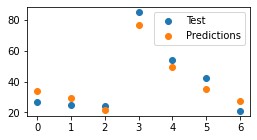

In [13]:
# Graph
plt.figure(figsize=(4,2))

plt.plot((y_test),'o')
plt.plot((y_pred_lr),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

#### Prediction for 9.25 hrs

In [14]:
hrs= np.array([9.25])

# Reshape
re_hrs = hrs.reshape(-1,1)

# Scalling
scale_hrs =scaler.transform(re_hrs)
scale_hrs

array([[1.00617284]])

In [15]:
hrs_pred_lr = lr.predict(scale_hrs)
print("No of Hours = " + str(re_hrs) )
print("Predicted Score = "+ str(hrs_pred_lr))

No of Hours = [[9.25]]
Predicted Score = [91.61018017]
